<a href="https://colab.research.google.com/github/AbuTalhaGT/ML-Algorithms/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Credit card fraud detection is a crucial application of machine learning in financial systems. However, fraud cases are rare, making the dataset highly imbalanced, which poses challenges for predictive modeling. This notebook demonstrates how to effectively address these challenges using machine learning techniques.

Objectives:

    Detect fraudulent transactions from credit card data.
    Handle the issue of data imbalance.
    Compare model performance and select the best approach.
---

#### Dataset Overview

The dataset used for this project contains transactions made by credit cards. It includes a highly imbalanced set of observations, where fraudulent transactions are a small fraction of the total.

Features:

    V1-V28: Principal components obtained via PCA.
    Amount: Transaction amount.
    Time: Time elapsed from the first transaction.
    Class: Fraud status (0 for non-fraud, 1 for fraud).

---

#### Exploratory Data Analysis (EDA)

To understand the data distribution and identify potential issues:

    Plot the distribution of features.
    Visualize the imbalance in the Class variable.
    Investigate correlations between features.

---

#### Handling Imbalanced Data

Given the highly imbalanced nature of the dataset, special techniques are applied:

    Resampling:
        Oversampling: Synthetic Minority Oversampling Technique (SMOTE).
        Undersampling: Random undersampling.

    Evaluation Metrics:
        Accuracy may not be suitable for imbalanced data. We use:
            Precision, Recall, F1-score, and ROC-AUC.

---

#### Modeling and Evaluation

We apply and evaluate several machine learning models:

    Logistic Regression
    Decision Tree
    Random Forest

For each model:

    Train on the imbalanced dataset and again on resampled dataset.
    Evaluate performance using confusion matrices.
    Compare results based on evaluation metrics.

---

#### Save the Trained Models

After training and evaluating the machine learning models, it is crucial to save them for future use. This allows you to avoid retraining the models every time you need to make predictions and facilitates easy deployment.

In this step, we will save the trained models using Python's joblib library. This will enable us to load and use the models later without needing to retrain them.

We will save the model for RandomForestClassifier

Notebook Reference : https://www.kaggle.com/code/rakibhossainsajib/credit-card-fraud-detection-on-imbalanced-data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib


#### Load and Explore the Dataset

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the CSV file from your Google Drive
import pandas as pd

# Provide the full path to the file in your Google Drive
file_path = '/content/drive/MyDrive/creditcard.csv'  # Update with the exact file path if necessary

# Step 3: Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Load dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Display dataset shape
df.shape

(284807, 31)

In [ ]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 284807


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995



#### Visualize Class Imbalance

Use seaborn to visualize the distribution of the target variable to understand class imbalance.


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


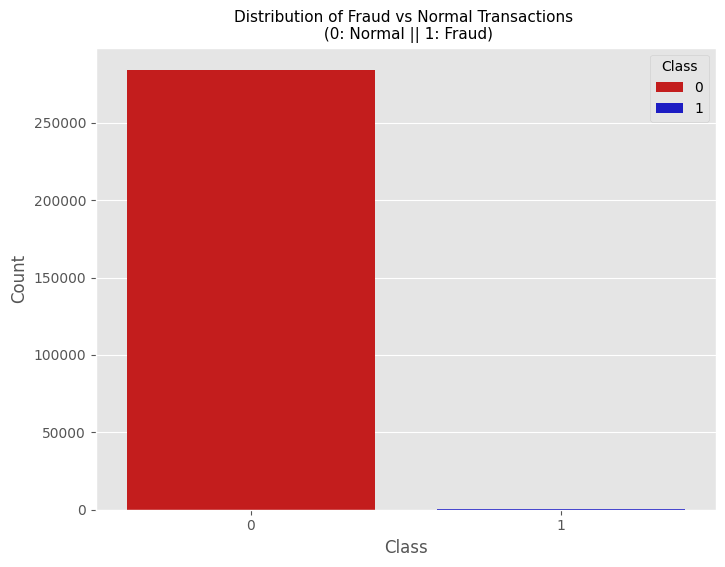

In [ ]:
# Visualize the distribution of the target variable
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


#### Data Preprocessing

    Check for missing or null values.
    Handle duplicates.
    Scale the features (Amount, Time).
    Split features and target.



In [ ]:
# Check for missing values
df.isnull().sum().sum()

0

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

1081

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(283726, 31)

In [ ]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']


#### Step 7: Investigate Correlations Between Features

Correlation analysis helps to understand how features in the dataset relate to each other. High correlation between features might indicate redundancy, while low correlation can suggest that features capture different aspects of the data.

Let's calculate and visualize the correlation matrix.


In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


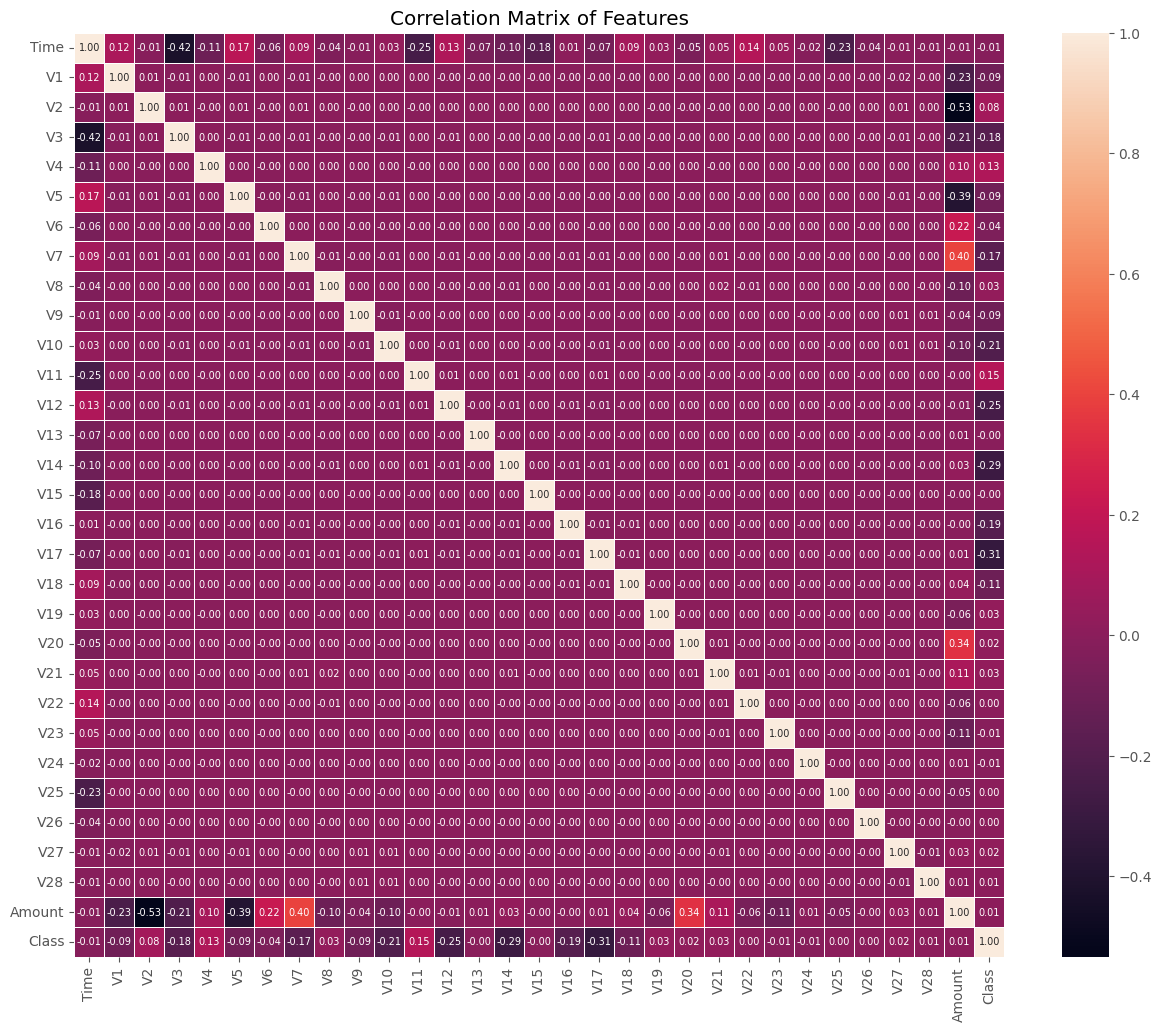

In [ ]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()


#### Split Data into Training and Test Sets


In [ ]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Check the shape
X_train.shape

(226980, 30)

In [ ]:
X_test.shape

(56746, 30)


### Train and Evaluate Model on Imbalanced Data

Train a model and evaluate its performance on the imbalanced dataset.


In [ ]:


def train_model(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data,
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix,
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

    Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """

    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================

Confusion Matrix:
[[56650     6]
 [   42    48]]


Accuracy: 0.9991541254009093


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.7666137155229219



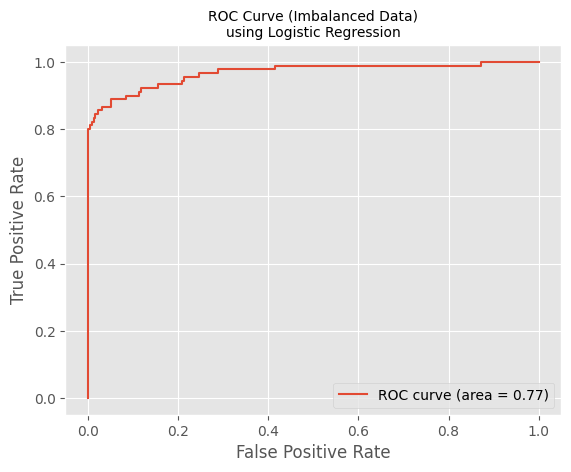




================ Decision Tree Classifier ================

Confusion Matrix:
[[56626    30]
 [   25    65]]


Accuracy: 0.9990307686885419


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.68      0.72      0.70        90

    accuracy                           1.00     56746
   macro avg       0.84      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.8608463553923875



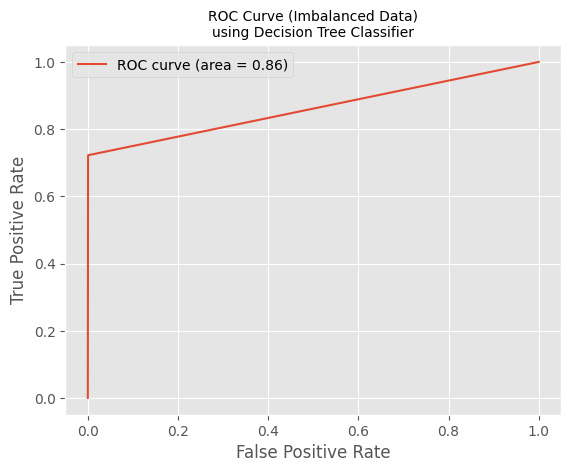




================ RandomForestClassifier ================

Confusion Matrix:
[[56654     2]
 [   24    66]]


Accuracy: 0.9995418179254926


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


ROC-AUC Score (Imbalanced Data): 0.8666490162854185



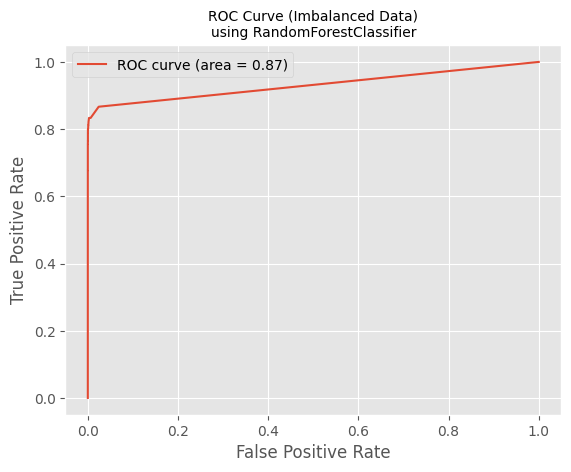

In [ ]:
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)


### Handling Imbalanced Data

Two techniques:

    Undersampling
    Oversampling




### Undersampling

Undersampling is a technique used in machine learning, particularly when dealing with imbalanced datasets (where one class significantly outnumbers another). In undersampling, you reduce the size of the majority class to match the size of the minority class to balance the dataset.

### Key Points:

Purpose: To address class imbalance, which can cause the model to be biased toward the majority class.
How it works: You randomly remove samples from the majority class until its size matches that of the minority class.

Result: Both classes have the same number of samples, which can help the model learn better from the minority class


In [ ]:
df[df['Class']==0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [ ]:
# Separate normal and fraud transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (283253, 31)
Fraud transactions shape: (473, 31)


In [ ]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [ ]:
# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (473, 31)


In [ ]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [ ]:
# Print few rows of new df
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.220424,2.040419,-0.090382,-1.172473,0.223198,0.095814,-0.698705,0.096513,-0.184768,0.258058,...,-0.254582,-0.621289,0.283872,-0.327701,-0.275980,0.197189,-0.073169,-0.072555,-0.342624,0
1,1.088898,-0.757714,0.478447,2.528442,-0.106152,-0.531890,0.057234,0.028185,0.048232,1.397162,...,-0.263373,-0.034266,-0.331785,0.456097,0.497129,0.642993,-0.075510,-0.171489,-0.289828,0
2,-0.778945,1.572441,-1.213639,-1.153023,-2.500236,0.979841,3.235834,-1.485561,0.746395,-1.985077,...,-0.266291,-0.525249,-0.002477,0.981843,0.548044,-0.191426,0.032333,0.014574,-0.293422,0
3,0.888544,0.057565,0.755854,-1.056738,-0.349881,0.422058,-0.055977,0.440358,0.468712,-0.266372,...,0.106575,0.125460,0.327868,0.188181,-0.798634,0.024141,-0.104751,-0.020439,-0.014268,0
4,0.373222,-0.656388,0.538490,-2.522893,1.628003,-2.237811,0.793889,5.128281,-1.690255,-0.473881,...,-0.472214,0.513928,0.293941,-0.069939,-0.894875,0.971569,0.304242,-0.529811,2.953396,0


In [ ]:
new_df.shape

(946, 31)

In [ ]:
# Check new class distribution
new_df['Class'].value_counts()

,count
Class,
0,473
1,473


In [ ]:
# Split new df into X and y
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Train test split on Undersampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[87  1]
 [ 9 93]]


Accuracy: 0.9473684210526315


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190


ROC-AUC Score (Imbalanced Data): 0.9502005347593582



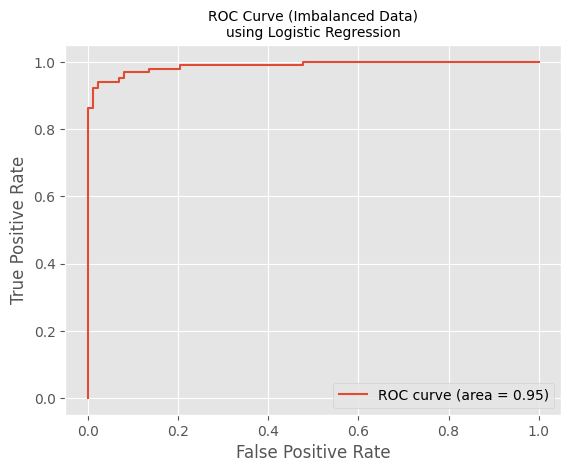




================ Decision Tree Classifier ================

Confusion Matrix:
[[85  3]
 [10 92]]


Accuracy: 0.9315789473684211


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        88
           1       0.97      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190


ROC-AUC Score (Imbalanced Data): 0.9339349376114082



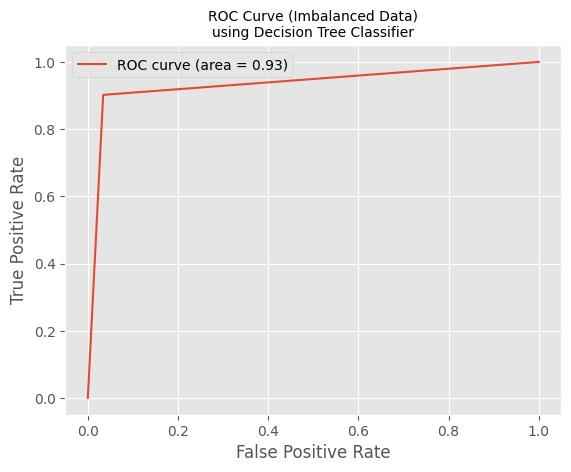




================ RandomForestClassifier ================

Confusion Matrix:
[[85  3]
 [ 9 93]]


Accuracy: 0.9368421052631579


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        88
           1       0.97      0.91      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190


ROC-AUC Score (Imbalanced Data): 0.9388368983957218



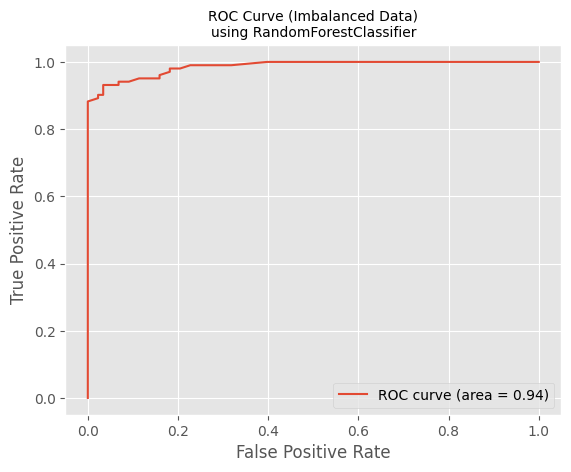

In [ ]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)


### Oversampling

    Use SMOTE to balance the dataset by oversampling the minority class



SMOTE (Synthetic Minority Over-sampling Technique) is a method used to handle imbalanced datasets by generating synthetic samples for the minority class. Instead of simply duplicating minority class instances, SMOTE creates new, synthetic data points by interpolating between existing minority class samples. This helps balance the class distribution, making models less biased towards the majority class.

In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Check new class distribution
y_resampled.value_counts()

,count
Class,
0,283253
1,283253


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[54996  1467]
 [ 4735 52104]]


Accuracy: 0.9452613369578649


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.92      0.94     56839

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302


ROC-AUC Score (Imbalanced Data): 0.9453564534235195



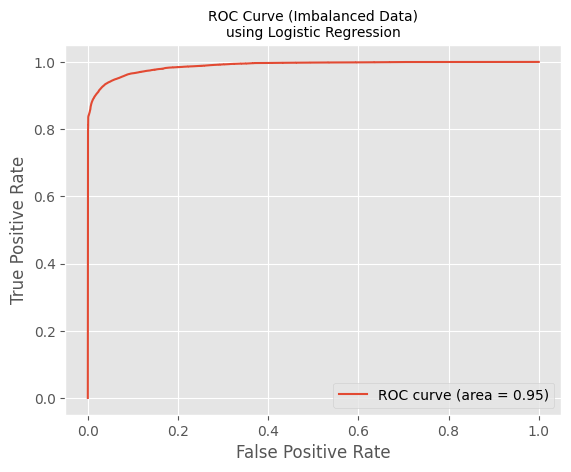




================ Decision Tree Classifier ================

Confusion Matrix:
[[56313   150]
 [   45 56794]]


Accuracy: 0.9982789359411132


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9982758415504754



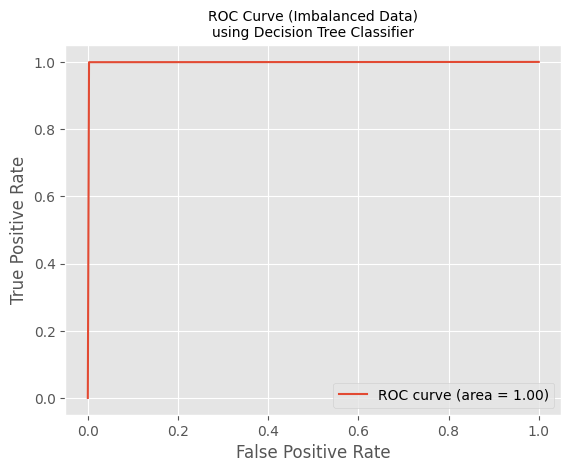




================ RandomForestClassifier ================

Confusion Matrix:
[[56452    11]
 [    0 56839]]


Accuracy: 0.9999029143351397


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302


ROC-AUC Score (Imbalanced Data): 0.9999025910773427



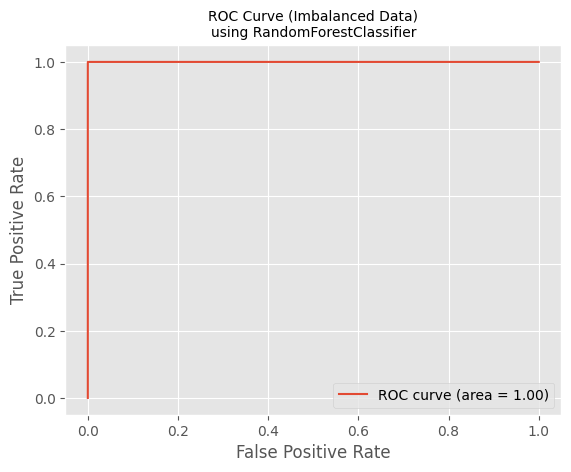

In [ ]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)


### Save the Trained Model

for example : Random Forest


In [ ]:
# Pick a model, e.g. Random Forest Classifier
# Fit the model with X_train, y_train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Save the model
joblib.dump(model, "credit_card_model.pkl")

['credit_card_model.pkl']

In [ ]:
# Predict with a sample data
pred = model.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")


Normal Transaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



## Conclusion

In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included:

    Data Exploration and Preprocessing: We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.

    Correlation Analysis: By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.

    Handling Imbalanced Data: We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.

    Model Training and Evaluation: We trained and evaluated various classifiers, including Logistic Regression, Decision Tree, and RandomForest. We assessed model performance using metrics such as confusion matrices, classification reports, ROC-AUC scores, and ROC curves.

    Model Saving: The trained models were saved for future use, ensuring that we can easily load and apply them for predictions on new data.

Key Findings:

    Feature Correlations: Our correlation analysis revealed important relationships between features. This understanding can guide feature selection and engineering in future analyses.

    Model Performance: The RandomForestClassifier demonstrated high accuracy in detecting fraud, showing that it is a strong candidate for deployment. The ROC-AUC scores and ROC curves provided insights into each model’s performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.

    Impact of Imbalance Handling: Techniques for balancing the dataset were essential in improving model performance and ensuring that the minority class (fraudulent transactions) was adequately represented in the training process.

Overall, this analysis has provided a robust framework for credit card fraud detection. The insights gained from feature correlations and model evaluations will be instrumental in refining our approach and improving detection capabilities. Future work could involve fine-tuning models further, experimenting with additional features, and exploring other advanced techniques for handling imbalanced data.
